<a href="https://colab.research.google.com/github/avishsonu/Datasets/blob/master/NetworkX_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [ ]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Steven', 'Laura')
G_symmetric.add_edge('Steven', 'Marc')
G_symmetric.add_edge('Steven', 'John')
G_symmetric.add_edge('Steven', 'Michelle')
G_symmetric.add_edge('Laura', 'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George', 'John')
G_symmetric.add_edge('George', 'Steven')

In [ ]:
print(nx.info(G_symmetric))

Graph with 6 nodes and 8 edges


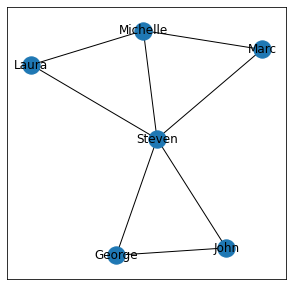

In [ ]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

In [ ]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

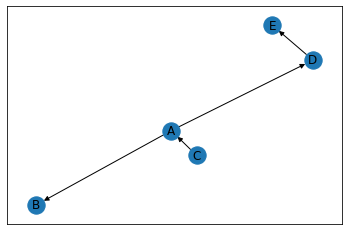

In [ ]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

In [ ]:
G_weighted = nx.Graph()
G_weighted.add_edge('Steven', 'Laura', weight=25)
G_weighted.add_edge('Steven', 'Marc', weight=8)
G_weighted.add_edge('Steven', 'John', weight=11)
G_weighted.add_edge('Steven', 'Michelle',weight=1)
G_weighted.add_edge('Laura', 'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc', weight=1)
G_weighted.add_edge('George', 'John', weight=8)
G_weighted.add_edge('George', 'Steven', weight=4)

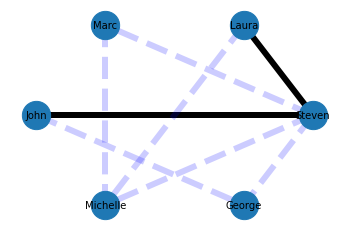

In [ ]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=800)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.2, edge_color='blue', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show();


In [ ]:
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [ ]:
nx.clustering(G_symmetric,'Laura')

1.0

In [ ]:
nx.average_clustering(G_symmetric)

0.8277777777777778

In [ ]:
nx.degree(G_symmetric, 'Michelle')

3

In [ ]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [ ]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

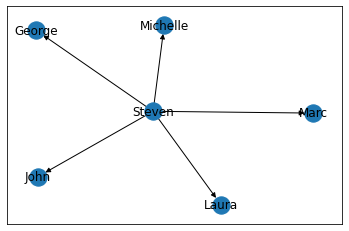

In [ ]:
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

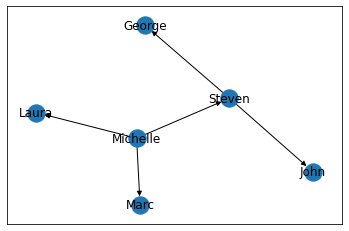

In [ ]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

In [ ]:
nx.eccentricity(G_symmetric,'Michelle')

2

In [ ]:
nx.eccentricity(G_symmetric,'Steven')

1

In [ ]:
nx.degree_centrality(G_symmetric)

{'George': 0.4,
 'John': 0.4,
 'Laura': 0.4,
 'Marc': 0.4,
 'Michelle': 0.6000000000000001,
 'Steven': 1.0}

In [ ]:
nx.eigenvector_centrality(G_symmetric)

{'George': 0.30844592433424667,
 'John': 0.30844592433424667,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'Michelle': 0.4443904166426225,
 'Steven': 0.6006686104947806}

In [ ]:
nx.closeness_centrality(G_symmetric)

{'George': 0.625,
 'John': 0.625,
 'Laura': 0.625,
 'Marc': 0.625,
 'Michelle': 0.7142857142857143,
 'Steven': 1.0}

In [ ]:
nx.betweenness_centrality(G_symmetric)

{'George': 0.0,
 'John': 0.0,
 'Laura': 0.0,
 'Marc': 0.0,
 'Michelle': 0.05,
 'Steven': 0.65}

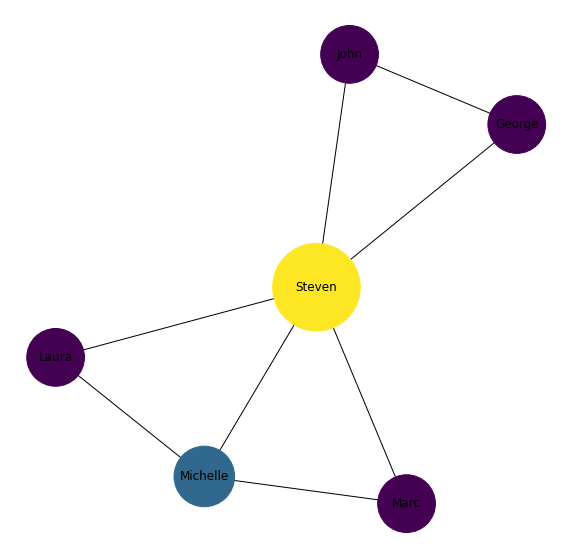

In [ ]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

In [ ]:
## Facebook Case Study

In [ ]:
import pandas as pd
df = pd.read_csv('facebook_combined.txt')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [ ]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [ ]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [ ]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


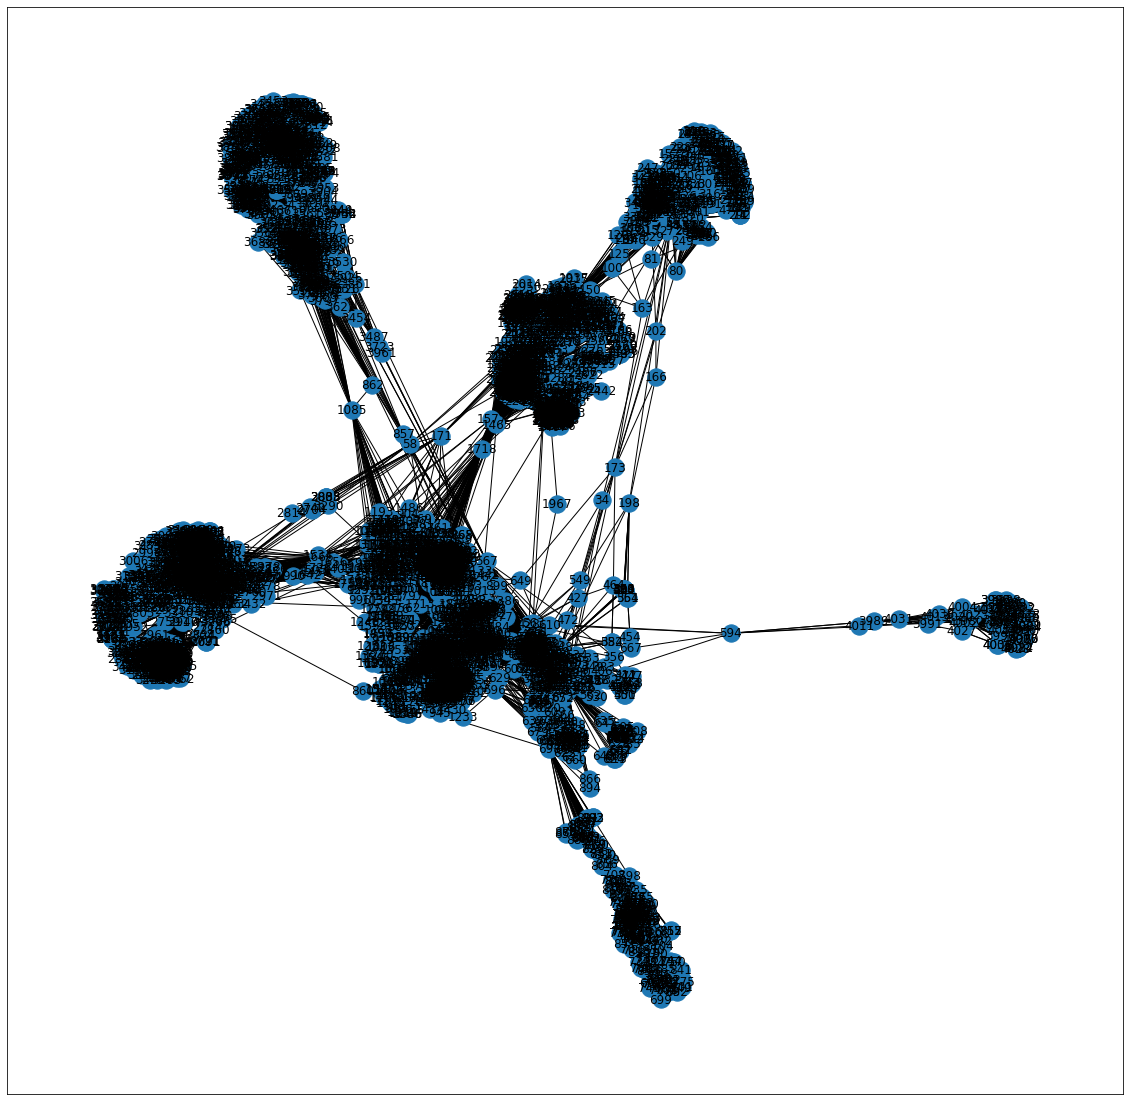

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

In [ ]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 1000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

NameError: ignored

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

NameError: ignored

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])

In [ ]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [ ]:
H = nx.path_graph(10)
G.add_nodes_from(H)